<a href="https://colab.research.google.com/github/vibhorjoshi/kaggle-challenge/blob/main/Price_cars_prediction_EDA_%2B_Blending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e9:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F76728%2F9057646%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240916%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240916T100038Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D197f42bd524b324c8851bdc2d8ded4d3e7c39738c40067c198aafd457dd697221dd346af80a5db684fcc9eb269479da634468b38ea2ce6238a1baf0a1381a20a03d6ca2c281c9083fe34ffef225064113ea9c5bed3fb276637c4e5f3d7fef50c29bade87452a97bc906dc541ec6fa9f92cc701e1d8578261029d7b4212cae3e1618796dc2b404aadeda438ca14920c6ea28e89baf460d5d672135cf21b2a62760cc4b3060333b8ab32853b1fb9aa3df762021a49e05e463a588720f5e08b17042cff51d15cfe1bed9e87c67af21fd5938b37dbb1cf7e2783f0c7990cbe8231eb226bedba8925297313046aae72839d7f7f9527eb1af36eeba506e63fc6a81c53,top-4-car-prices-used:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5675353%2F9394782%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240916%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240916T100038Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D797464add54b5a272673e4ce34ba21e86bfdcefa398fc646b4534d80ab706cda0e6ad0eb97db2c9b62ee12d27df23749f98520bd237224b6c3fe0bc629b9fe3c6f733c3fc6ebb78a88c6735fecd8c6f42d1688e318e11e81fd3d72ecd5d6204577bc1f5a34e3d6285b6b3ad4edf4928a03c32d0ca3ad8ad1e8065738bf5d71ca7fd707048430b79e1916dc86fe80e2761cd40cefb139d102f239fd63107bd8d4cea0e798ced25110c65556a08acd45d23e4c4bf733ad96b1fca76ebf2c38373a7468711f6c975a085412f4f2dd4b14b62ac9c843bd7859d24e103d558f482fc50553de20c404dee8633d6f029d270355f3c80b6cc2c947768cdf43fa55ecc166'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 8223535 bytes downloaded
Downloaded and uncompressed: playground-series-s4e9
[==================================================] 10437926 bytes downloaded
Downloaded and uncompressed: top-4-car-prices-used
Data source import complete.



<center>
<img src="https://i.postimg.cc/158z72Yj/car1.png" width=1100>
</center>

# OVERVIEW

# About this competition

**Task**: To develop a model that can be used to predict the **price** of used cars based on various attributes.

**Dataset**: Training dataset (train.csv): Contains features along with the target variable, price is the continuous target.Test dataset (test.csv): Contains the features but requires predictions the value of price for each row.

**Evaluation**: The performance of the model is evaluated using the Root Mean Squared Error (RMSE).

The dataset was generated from a deep learning model

# Column description

| NAME         | DESCRIPTION       |
|-------------------------------------------|-----------|
| |                                 <div style="color:blue; text-align:center"> Numerical Features  </div>    |
| **<mark> Price (Target variable)</mark>**                 | We want to predict, which is the sale price of the used car|
| **Model year**                 |  The year the car was manufactured and rolled out from the factory. Indicates the actual production year of the vehicle|
|**Mileage**|The mileage of the car, indicating how far the car has been driven|
| |                                 <div style="color:blue; text-align:center"> Categorical Features  </div>    |
|**Brand** | The manufacturer of the car (BMW, Audi, Chevrolet, etc)|
|**Model** | The model name of the car (BMW 328i, Chevrolet Camaro 1LT, etc.)|
|**Fuel type** | The type of fuel the car uses (Gasoline, Diesel, Electric, etc.)|
|**Engine type** | The specifications of the car’s engine (displacement, number of cylinders and horsepower)|
|**Transmission** | The type of transmission in the car ( Automatic -A/T, Manual -M/T, etc.)|
|**Exterior & interior colors** | The exterior and interior color of the car|
|**Accident history** |  Indicates whether the car has been involved in any accidents or has sustained damage|
|**Clean title** | Indicates the status of the car's title. 'Yes' / 'No' means the car has / doesn't have a clean title|




# LIBRARIES AND DATA LOADING

In [61]:
pip install catboost

In [62]:
# Importing Libs

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from prettytable import PrettyTable

#sns.set(style="whitegrid", palette="pastel")
import warnings
warnings.filterwarnings("ignore")


# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold

# Model library
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

warnings.filterwarnings("ignore") #seaborn is loud...

# Model Evaluating
from sklearn.metrics import mean_squared_error


In [63]:
# Loading the Datasets

path  = '/kaggle/input/playground-series-s4e9/'
train = pd.read_csv(path + 'train.csv')
test  = pd.read_csv(path + 'test.csv')
subs  = pd.read_csv(path + 'sample_submission.csv')

In [64]:
# Data Dimensions

print(' >> Train Data dimensions: ' , train.shape)
print(' >> Test  Data dimensions: ' , test.shape)

 >> Train Data dimensions:  (188533, 13)
 >> Test  Data dimensions:  (125690, 12)


### Showing of the train dataset

In [65]:
def table(dd):
    c='#00c09f'
    return dd.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props":"background-color:lightgrey; color:black; font-size:1.0rem;"
                                                            },
                          #  {"selector":"td",
                          #  "props":"color:black; font-size:0.8rem; border:1px solid lightgray"},

                         {"selector":"td",
                     "props":"border:solid lightgrey;  color:black; font-size:0.9rem; border:1px solid lightgray"},

    ])

table(train.head(3))

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability,A/T,Blue,Gray,None reported,Yes,13900


### Showing of the test dataset

In [66]:
table(test.head(3))

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,nan


### Showing of the sub sample

In [67]:
table(subs.head(3))

,id,price
0,188533,43878.016000
1,188534,43878.016000
2,188535,43878.016000


###  Duplicates check

In [68]:
print('The duplicate rows in the train dataset :', train.duplicated().sum() )

The duplicate rows in the train dataset : 0


In [69]:
print('The duplicate rows in the test dataset :', test.duplicated().sum() )

The duplicate rows in the test dataset : 0


### The data type of each columns of train dataset

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


We have 3 numerical column: milage, model_year and price and several categorical

In [71]:
features     = ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']
num_features = ['model_year', 'milage']
cat_features = ['clean_title', 'accident', 'model', 'transmission', 'engine', 'ext_col', 'fuel_type', 'int_col', 'brand']

# DATA PREPARATION

# Filling of missing values

Before:

In [72]:
print('The missing values of train dataset : \n', train.isnull().sum())

The missing values of train dataset : 
 id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


In [73]:
print('The missing values of test dataset : \n' , test.isnull().sum())

The missing values of test dataset : 
 id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64


We can observe that there are **many** missing values in the **'clean_title'** column. It’s possible that respondents avoided answering to hide the fact that the car does not have a **clean title**. Therefore, it’s important to handle these missing values carefully or explore various methods to address them.

We'll clean them.

In [74]:
def cleaning_data(df):

    fuel_type_imputer = SimpleImputer(strategy='most_frequent')
    df['fuel_type']   = fuel_type_imputer.fit_transform(df[['fuel_type']]).ravel()

    missing_label_imputer = SimpleImputer(strategy='constant', fill_value='missing')
    df[['accident', 'clean_title']] = missing_label_imputer.fit_transform(df[['accident', 'clean_title']])

    return df

After:

In [75]:
df_train_cleaned = cleaning_data(train)
print('The missing valuse of train dataset after handling missing values : \n', df_train_cleaned.isnull().sum())

The missing valuse of train dataset after handling missing values : 
 id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


In [76]:
df_test_cleaned = cleaning_data(test)
print('The missing values of test dataset : \n' , test.isnull().sum())

The missing values of test dataset : 
 id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64


# Encoding¶

We have two numerical features: **model_year** and **milage**. We'll use **Ordinal Encoding** for the categorical features.
The numerical features will be standardized.

In [77]:
num_features = ['milage', 'model_year']
cat_features = ['clean_title', 'accident', 'model', 'transmission', 'engine', 'ext_col', 'fuel_type', 'int_col', 'brand']

num_cols = ["model_year", "milage"]
cat_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

target_col = "price"

In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])

# Alternatively, normalization
normalizer = MinMaxScaler()
train[num_cols] = normalizer.fit_transform(train[num_cols])


In [79]:
from sklearn.impute import SimpleImputer

# Imputation for numerical features
num_imputer = SimpleImputer(strategy='median')
train[num_cols] = num_imputer.fit_transform(train[num_cols])

# Imputation for categorical features (assuming ordinal encoding was already applied)
cat_imputer = SimpleImputer(strategy='most_frequent')
train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])


In [80]:
# Interaction between milage and model year
train['milage_model_year_interaction'] = train['milage'] * train['model_year']


In [81]:
pip install category_encoders

In [82]:
from category_encoders import TargetEncoder

target_encoder = TargetEncoder(cols=cat_cols)
train[cat_cols] = target_encoder.fit_transform(train[cat_cols], train[target_col])


In [83]:
# Using IQR to detect and remove outliers
Q1 = train[num_features].quantile(0.25)
Q3 = train[num_features].quantile(0.75)
IQR = Q3 - Q1

df = train[~((train[num_features] < (Q1 - 1.5 * IQR)) | (train[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [84]:
threshold = 0.01  # Frequency threshold
for col in cat_cols:
    value_counts = train[col].value_counts(normalize=True)
    rare_labels = value_counts[value_counts < threshold].index
    train[col] = train[col].replace(rare_labels, 'Other')


In [85]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Assuming df is your dataset
# num_features: Numerical features
# cat_features: Categorical features
# target_col: Target variable (price)

# 1. Separating features and target
X = df[num_features + cat_features]  # Features
y = df[target_col]  # Target variable (price)

# 2. One-Hot Encoding for Categorical Features and Standardization for Numerical Features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),   # Standardize numerical features
        ('cat', OneHotEncoder(drop='first'), cat_features)  # One-Hot Encode categorical features
    ])

# 3. Log normalization of the target variable (y)
y_log = np.log(y)

# 4. Creating a pipeline that applies preprocessing and trains a linear model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing: scaling and one-hot encoding
    ('model', LinearRegression())    # Model: Linear regression
])

# 5. Implement Leave-One-Category-Out Cross-Validation (LOCOCV) using 'brand' as the group
logo = LeaveOneGroupOut()
groups = df['brand']  # Group by 'brand' for LOCOCV

# Perform cross-validation using LOCOCV
cv_scores = cross_val_score(model_pipeline, X, y_log, cv=logo.split(X, y_log, groups), scoring='neg_mean_squared_error')

# Print the mean and standard deviation of the CV scores
print(f'Mean MSE (Log-Normalized): {-np.mean(cv_scores):.4f}, Std MSE: {np.std(cv_scores):.4f}')

# 6. Fit the pipeline on the entire dataset
model_pipeline.fit(X, y_log)

# 7. Make predictions and inverse transform the log-normalized target
y_pred_log = model_pipeline.predict(X)
y_pred = np.exp(y_pred_log)  # Inverse of log to return to original price scale

# 8. Calculate Mean Squared Error on the original price scale
mse = mean_squared_error(y, y_pred)
print(f'MSE on the original price scale: {mse:.4f}')



Mean MSE (Log-Normalized): nan, Std MSE: nan
MSE on the original price scale: 5248058062.3935


In [86]:


# Print specific columns to check results
#print(df[['transmission', 'transmission_type']])

# Check the shape to ensure no columns are removed
#print(df.shape)

In [87]:
# Define a function to extract fuel type from the engine column
def extract_fuel_type(engine_info):
    if pd.isna(engine_info):
        return np.nan
    if isinstance(engine_info, str): # Check if the value is a string
        if 'Gasoline' in engine_info:
            return 'Gasoline'
        elif 'Hybrid' in engine_info:
            return 'Hybrid'
        elif 'Flex Fuel' in engine_info or 'E85' in engine_info:
            return 'Flex Fuel'
        elif 'Diesel' in engine_info:
            return 'Diesel'
        elif 'Electric' in engine_info:
            return 'Electric'
        else:
            return np.nan
    else:
        return np.nan # Return NaN if not a string


train['extracted_fuel_type'] = train['engine'].apply(extract_fuel_type)
train['fuel_type'].fillna(train['extracted_fuel_type'], inplace=True)
train.drop(columns=['extracted_fuel_type'], inplace=True)

test['extracted_fuel_type'] = test['engine'].apply(extract_fuel_type)
test['fuel_type'].fillna(test['extracted_fuel_type'], inplace=True)
test.drop(columns=['extracted_fuel_type'], inplace=True)

### Train dataset after preparation:

In [88]:
table(train.head(3))

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,milage_model_year_interaction
0,0,Other,Other,0.660000,0.525809,43879.022260,Other,31711.979140,Other,28182.418129,49024.804144,41354.406704,4200,0.347034
1,1,30712.595130,Other,0.560000,0.353544,43879.022260,Other,31711.979140,31878.405296,29953.997428,25334.071475,41354.406704,4999,0.197985
2,2,41836.755127,Other,0.560000,0.337444,26729.755457,Other,31711.979140,40658.658811,28182.418129,49024.804144,41354.406704,13900,0.188969


# EXPLORATORY DATA ANALYSIS

# Features structure

We have 3 numerical column: **milage**, **model_year** and **price** and several categorical.

Let's show structure of the numerical fearures.

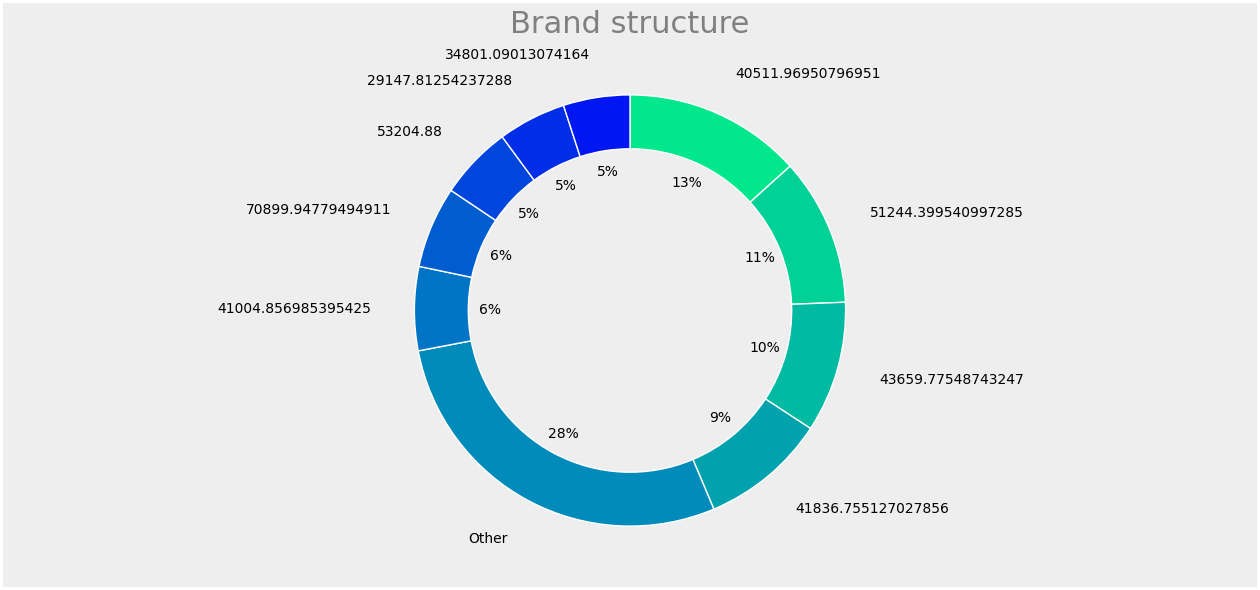

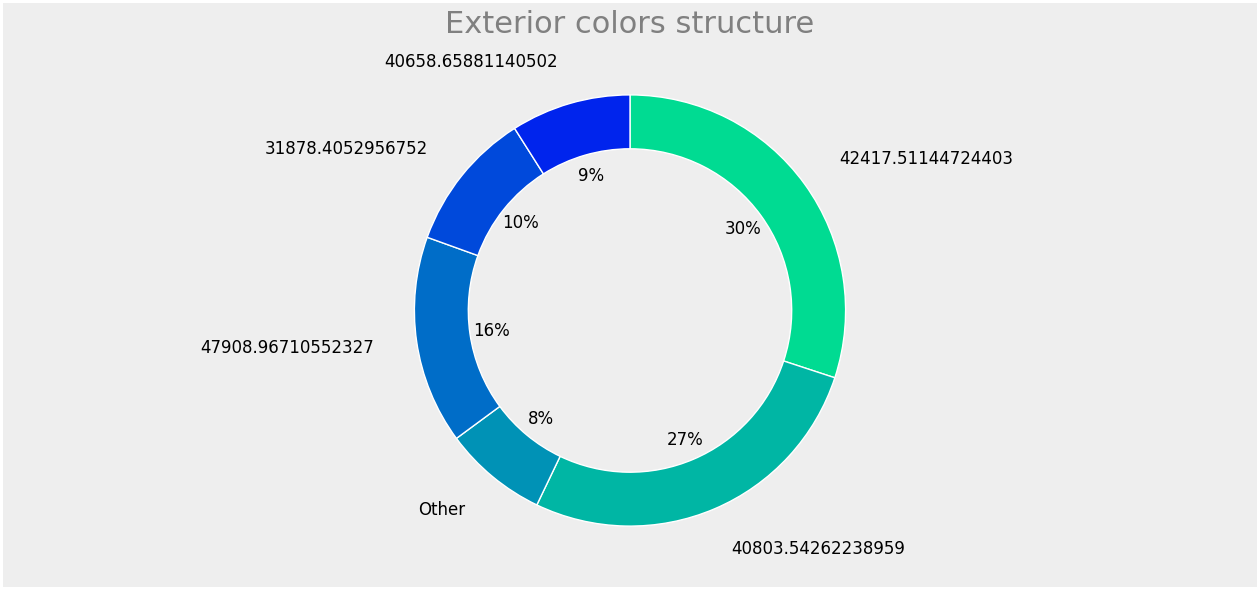

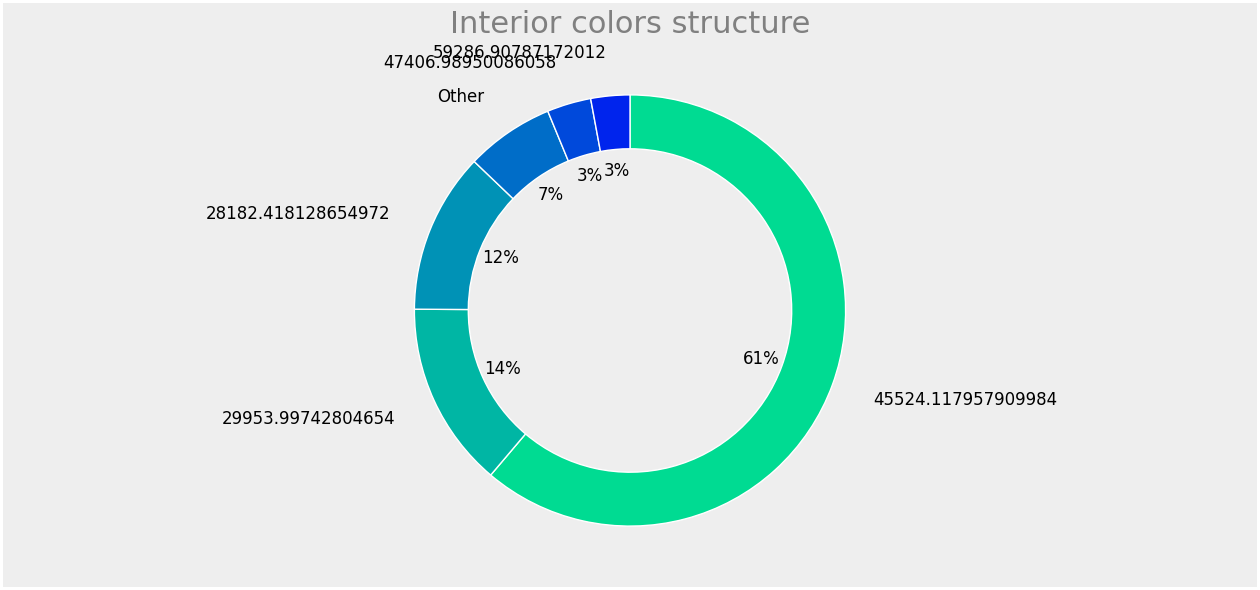

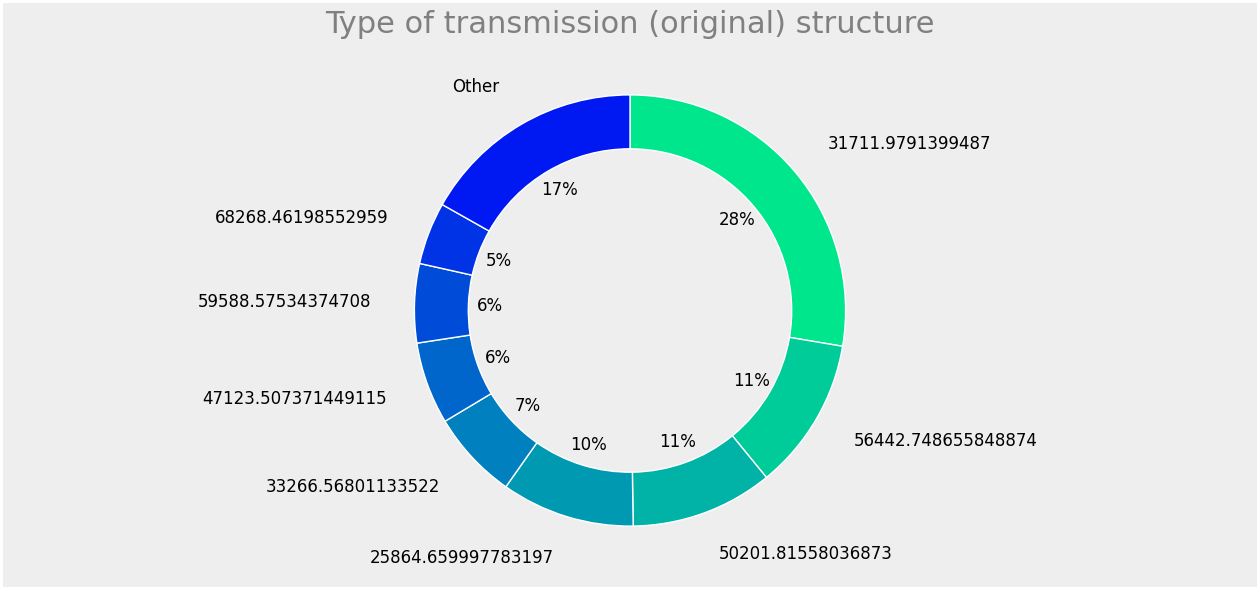

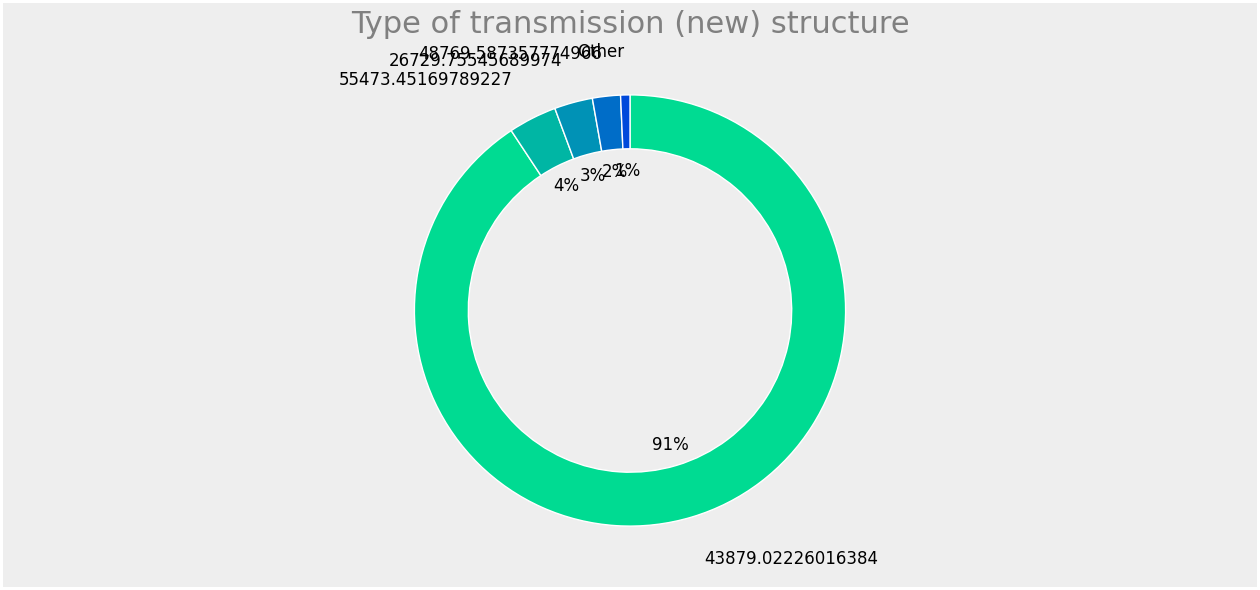

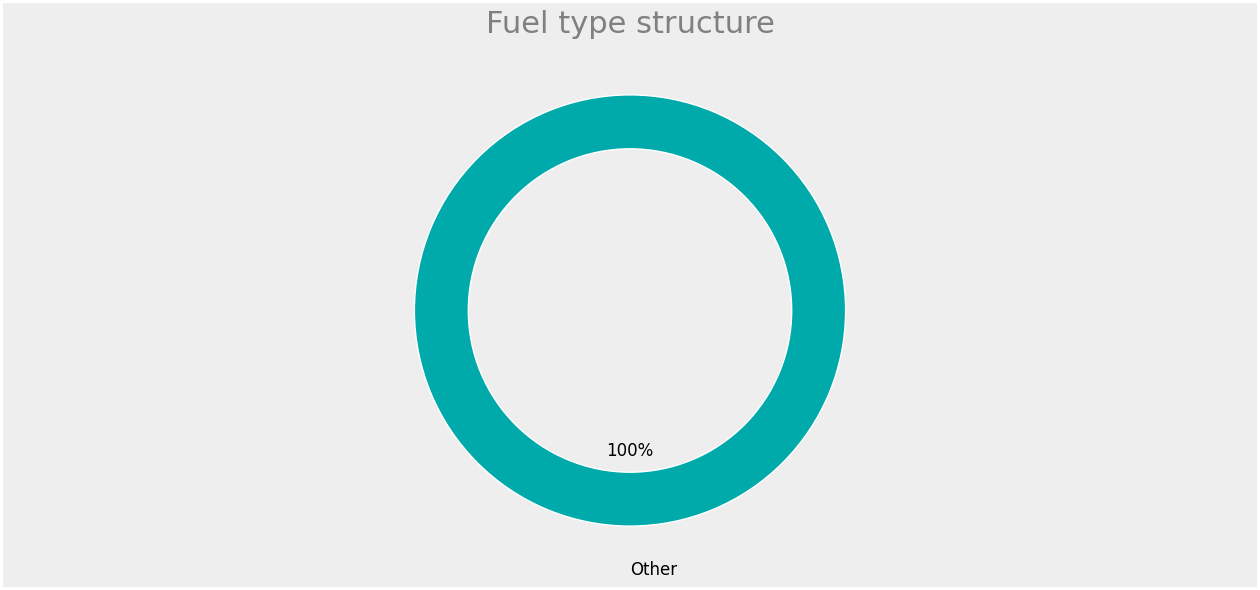

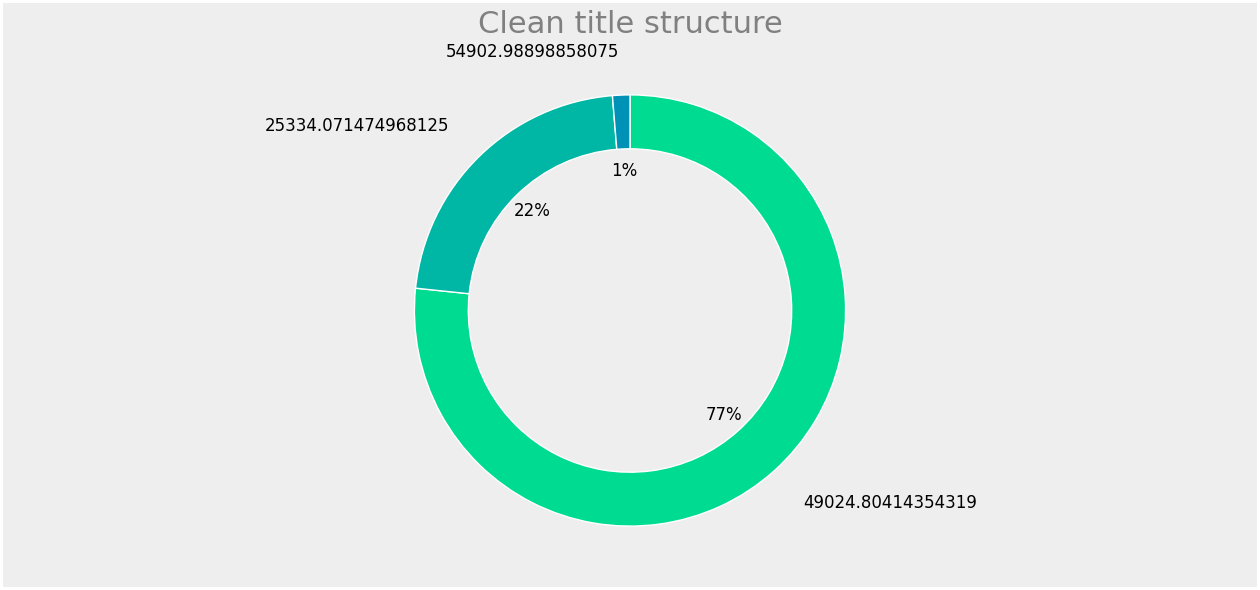

In [90]:
def Pie1(NC, dd, other, title):
#    NC  number of categor.
    if other:
        palette_color =  list(reversed(sns.color_palette("winter",n_colors = NC).as_hex()))+['#dddddd']
        d1 = dd.value_counts(normalize=True)
        d2 = d1[0:NC]
        d2['Other']=1-d1[0:NC].sum()
    else:
        palette_color =  list(reversed(sns.color_palette("winter").as_hex()))
        d1 = dd.value_counts(normalize=True)
        d2 = d1

    plt.pie(d2, autopct = '%1.0f%%', wedgeprops=dict(width=0.25, edgecolor='white'), labels = d2.index.tolist(),
           pctdistance=0.65, labeldistance=1.2, colors=palette_color, startangle=90,
            counterclock=False)

    plt.rcParams['font.size'] = 12
    plt.title(f'{title}', color='gray', fontsize=22)

col    = ['brand', 'ext_col', 'int_col','transmission', 'fuel_type', 'clean_title', 'accident']
NCS = [10, 6, 6, 9, 0, 2, 0, 0]
titles = ['Brand structure', 'Exterior colors structure', 'Interior colors structure',
          'Type of transmission (original) structure', 'Type of transmission (new) structure',
          'Fuel type structure', 'Clean title structure', 'Accidents structure']
j=0
for i in col:
    #plt.figure(figsize=(16, 6))
    fig, axs  = plt.subplots(1, 3, figsize=(16 ,7))
    plt.subplot(1,5, 1)
    plt.axis('off')
    plt.subplot(1,5, (2,4))

    if NCS[j] == 0:
        Pie1(1, train[i], False, titles[j])
    else:
        Pie1(NCS[j], train[i], True, titles[j])
    fig.patch.set_linewidth(3)
    #fig.patch.set_edgecolor('black')
    fig.patch.set_facecolor('#eeeeee')

    plt.subplot(1,5, 5)
    plt.axis('off')
    plt.show()
    j=j+1
    print()

Then we visualize the distribution of price

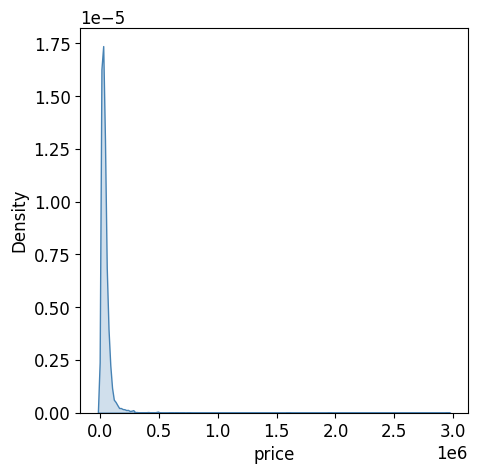

In [91]:
fig, axs  = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.kdeplot(data=train, x='price', color='steelblue', fill=True, log_scale=False)
ax.set(xlabel='price')
plt.show()

We see that the **price** distribution is **not normal**, therefore we'll perform log-normalization

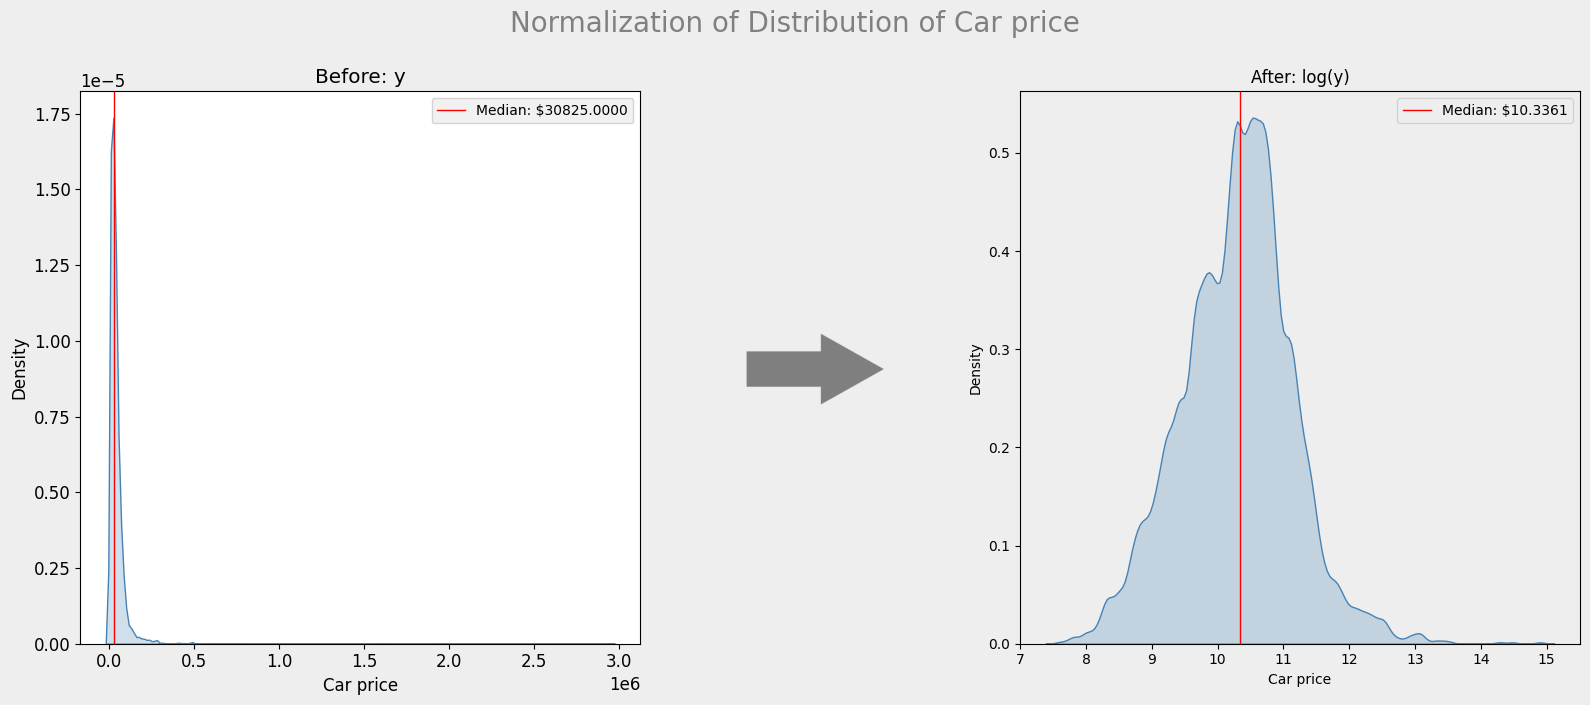

In [92]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io

# Setting for the overall plot title
SupTitleSize = 20

def hist_one(d, b, col, transf, show_median=True, median_prec=2):
    """
    This function generates a single KDE plot for the given data `d` and displays median.

    Parameters:
    - d: data to plot
    - b: number of bins
    - col: column name (for labeling)
    - transf: transformation name for the plot title
    - show_median: whether to show the median line or not
    - median_prec: decimal precision for the median value
    """
    # Generate the KDE plot
    sns.kdeplot(d, color='steelblue', fill=True, log_scale=False)

    if show_median:
        # Adding median line with precise value
        median_price = d.median()
        median_label = f'Median: ${median_price:.{median_prec}f}'  # Display median with desired precision
        plt.axvline(median_price, color='red', linestyle='-', linewidth=1, label=median_label)

    # Setting plot aesthetics
    plt.title(transf)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.rcParams['font.size'] = 10
    fig.patch.set_linewidth(1)
    plt.rcParams['axes.facecolor'] = '#eeeeee'
    plt.legend()

def hist1(t1, t2, col, transf, median_prec=2):
    """
    This function plots two KDE plots: before and after the transformation.

    Parameters:
    - t1: original data
    - t2: transformed data
    - col: column name
    - transf: transformation name for after plot
    - median_prec: decimal precision for the median value
    """
    fig, axs  = plt.subplots(1, 3, figsize=(16, 7))

    # Set overall title for the comparison
    plt.suptitle(f'Normalization of Distribution of {col}', fontsize=SupTitleSize, y=1, color='gray')

    # Plot the "Before" distribution
    plt.subplot(1, 5, (1,2))
    hist_one(t1, 100, col, transf='Before: y', median_prec=median_prec)

    # Plot the arrow image
    plt.subplot(1, 5, 3)
    a = io.imread("https://i.postimg.cc/PxxDw6W8/arrow2.png")
    plt.imshow(a)
    plt.axis('off')

    # Plot the "After" distribution
    plt.subplot(1, 5, (4,5))
    hist_one(t2, 30, col, f'After: {transf}(y)', median_prec=median_prec)

    # Set background color and ensure consistent layout
    fig.patch.set_facecolor('#eeeeee')
    plt.tight_layout()
    plt.show()

# Original price distribution
t1 = train.price

# Log-transformed price distribution (ensuring constant distribution)
t2 = np.log1p(train.price)  # log1p(x) is more stable and avoids issues with zeros

# Plot the distributions with more precise median value (e.g., 4 decimal places)
hist1(t1, t2, 'Car price', 'log', median_prec=4)


Let's show on model_year distribution:

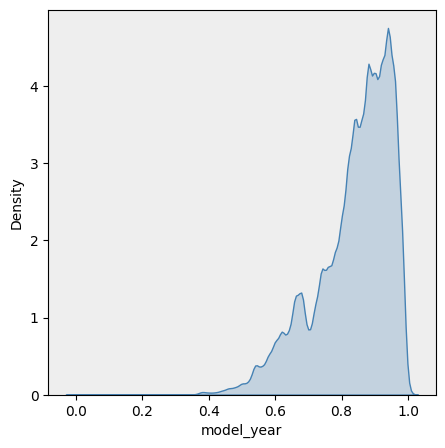

In [93]:
fig, axs  = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.kdeplot(data=train, x='model_year', color='steelblue', fill=True, log_scale=False)
ax.set(xlabel='model_year');
plt.show()

And finally let's show on milage distribution:

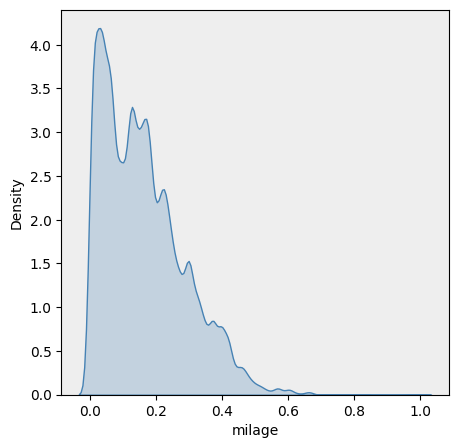

In [94]:
fig, axs  = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.kdeplot(data=train, x='milage', color='steelblue', fill=True, log_scale=False)
ax.set(xlabel='milage');
plt.show()

And we'll perform root-normalization:

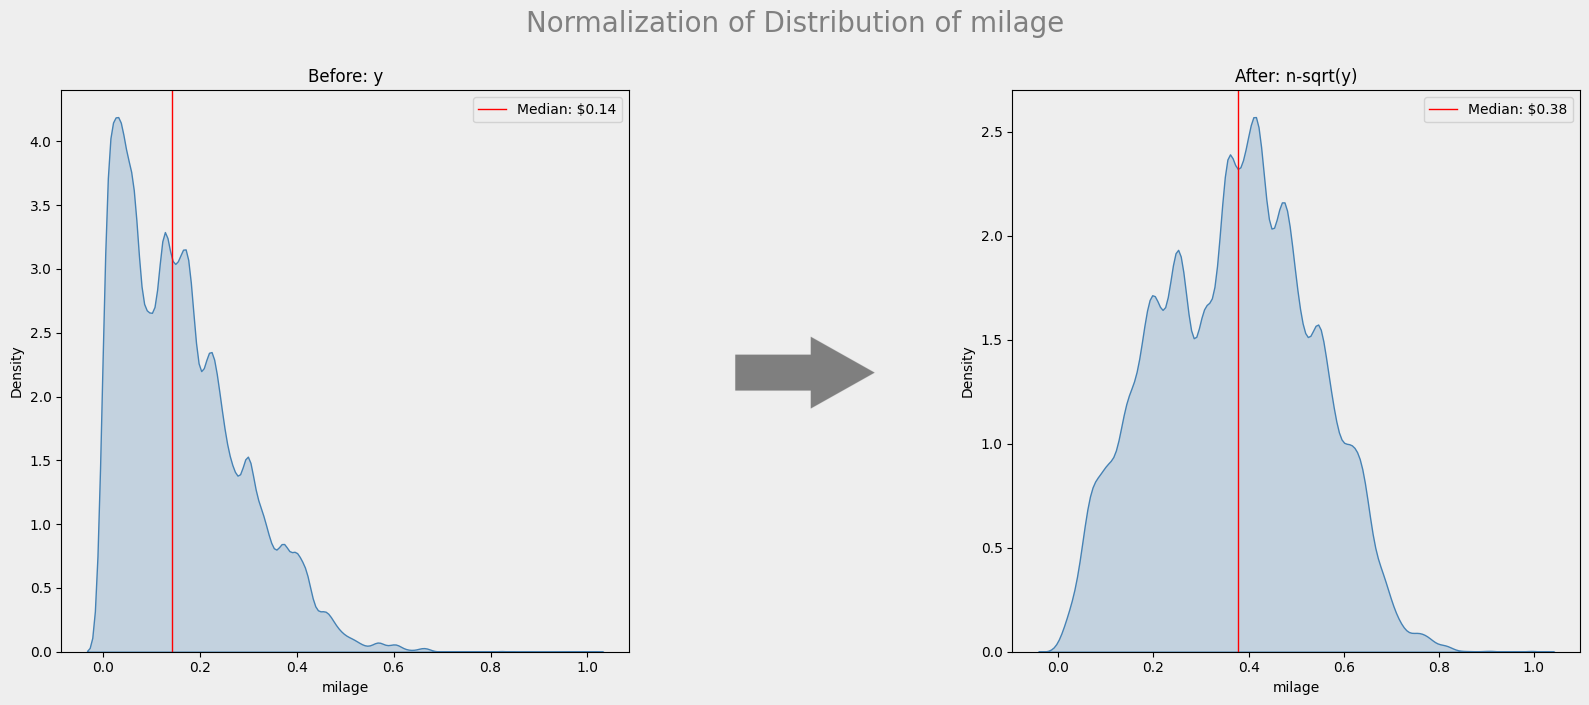

In [95]:
t1 = train.milage
t2 = np.power(train.milage, 1/2)
hist1(t1, t2, 'milage', 'n-sqrt')

# Relationships between numerical variables

 Let's see relationship between mileage and price.

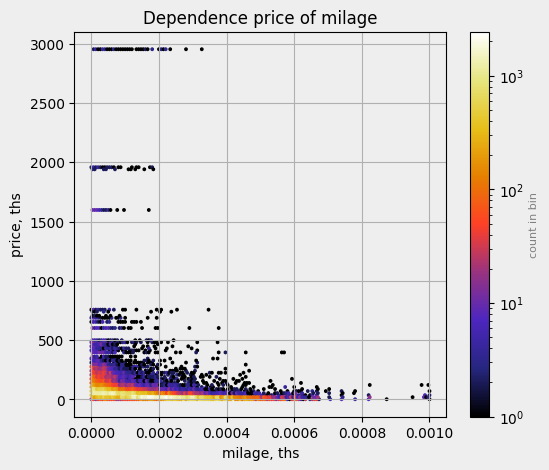

In [96]:
def hexb_one(x, y, title):
    gs=150
    fig, axs  = plt.subplots(1, 1, figsize=(6, 5))
    Cmap = 'CMRmap'
    plt.title(title)
    plt.hexbin (x=x, y=y, gridsize=gs, cmap=Cmap, bins='log', alpha = 1)
    #sns.regplot(data=train, x='model_year', y='price',  fit_reg=1, line_kws=dict(color=color_r, linewidth=2), order =1)
    fig.patch.set_facecolor('#eeeeee')
    plt.colorbar().set_label(label='count in bin',size=8, color  = 'grey')
    plt.grid()


color_r='orange'

#plt.subplot(1, 1, 1)
hexb_one(train.milage/1000,  train.price/1000, 'Dependence price of milage')
plt.xlabel('milage, ths')
plt.ylabel('price, ths')
plt.show()



We see obvious observations: the lower the mileage and the higher the year, the higher the price

We can see that there is no a clear relationship between mileage and price.


We next explore model_year.

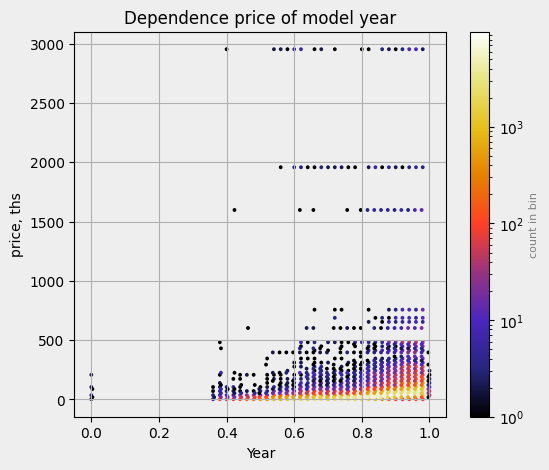

In [97]:
#plt.subplot(1, 1, 1)
hexb_one(train.model_year, train.price/1000, 'Dependence price of model year')
plt.xlabel('Year')
plt.ylabel('price, ths')
plt.show()

Observations: the lower the mileage and the higher the year, the higher the price

We can see that there is no a clear relationship between model year and price.

And finally we can see relationship between model year and millage.

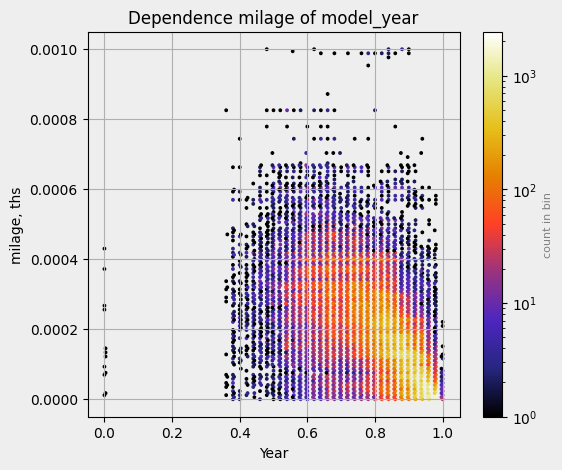

In [98]:
hexb_one(train.model_year, train.milage/1000, 'Dependence milage of model_year')
plt.xlabel('Year')
plt.ylabel('milage, ths')
plt.show()


We can see observations: the lower the year, the lower the millage

# Correlaion matrix

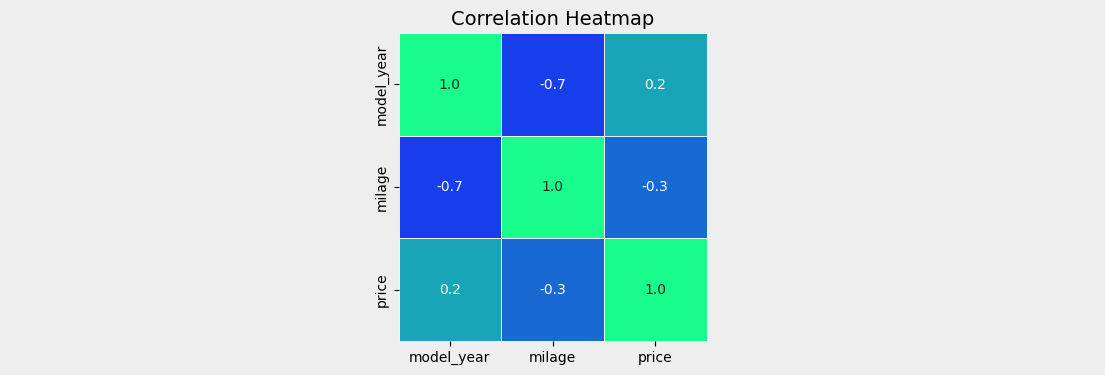

In [99]:
fig, axs  = plt.subplots(1, 3, figsize=(14, 4))
corr_matrix = train[num_cols + [target_col]].corr()
plt.subplot(1, 3,1)
plt.axis('off')
plt.subplot(1, 3,2)
sns.heatmap( corr_matrix, square = True, cmap = 'winter',alpha =0.9, vmin=-1, vmax=1, center= 0, linewidths=0.5, linecolor='white', annot=True, fmt='.1f', cbar=False)
plt.title("Correlation Heatmap", fontsize=14)
#fig.patch.set_edgecolor('black')
plt.subplot(1, 3,3)
plt.axis('off')
plt.rcParams['axes.facecolor'] = '#eeeeee'
fig.patch.set_facecolor('#eeeeee')

plt.show()

#### Some observation:
- Features **Model** and **Engine** have a lot of unique values. No unique value exceeds 2% of entire dataset
- Would be worth dealing with rare categories - probably combine categories or add "Other" category
- **Clean_Title** feature has only 1 unique value, and 11% of the dataset has Null values, worth adding **"Not Available"**
- There is 2 numerical features
- The correlations between **price** and the other features (**model_year** and **milage**) are moderate.
- The strong negative correlation between **model_year** and **milage** (-0.67) indicates that these two variables are inversely related; thus, one could potentially predict the **mileage** of a car based on its **model year**.


# MODELLING

## Blending

This part is an ensemble of top 5 public notebook solutions as on 11-09-2024.

The scores are improving from 1st to 5th submission.

In [100]:
def read_csv(number: int) -> pd.DataFrame:
    file = pd.read_csv(f'/kaggle/input/top-4-car-prices-used/{number}.csv')  # Use an f-string for cleaner formatting
    return file

csv0 = read_csv(72016)
csv1 = read_csv(72018)
csv2 = read_csv(72020)
csv3 = read_csv(72021)
csv4 = read_csv(72025)



In [101]:
csv = csv0
csv.rename(columns={'price':'72016'}, inplace=True)
csv['72018'] = csv1['price']
csv['72020'] = csv2['price']
csv['72021'] = csv3['price']
csv['72025'] = csv4['price']

csv.head(10).round(0)

,id,72016,72018,72020,72021,72025
0,188533,17286.0,17278.0,17325.0,17253.0,17109.0
1,188534,78406.0,78388.0,78531.0,78342.0,77965.0
2,188535,55893.0,55943.0,55931.0,56057.0,56309.0
3,188536,28963.0,28925.0,28959.0,28845.0,28616.0
4,188537,29857.0,29862.0,29871.0,29912.0,29994.0
5,188538,18667.0,18689.0,18615.0,18770.0,19079.0
6,188539,12248.0,12240.0,12283.0,12253.0,12192.0
7,188540,43399.0,43366.0,43417.0,43398.0,43358.0
8,188541,81726.0,81699.0,81561.0,81698.0,81972.0
9,188542,31785.0,31791.0,31831.0,31732.0,31534.0


In [102]:
csv['price'] = 1.03*0.999*csv['72016'] + 0.001*csv['72018']
csv

,id,72016,72018,72020,72021,72025,price
0,188533,17286.205793,17278.279662,17324.902043,17252.808476,17108.621343,17804.265454
1,188534,78406.384175,78388.394866,78530.885844,78342.248924,77964.975084,80756.205519
2,188535,55893.402697,55942.893449,55931.005159,56057.014704,56309.033795,57568.577467
3,188536,28963.187882,28925.059126,28959.438076,28844.935433,28615.930145,29831.176495
4,188537,29856.918937,29862.492397,29870.908127,29911.815200,29993.629346,30751.736371
...,...,...,...,...,...,...,...
125685,314218,28517.042183,28481.697163,28484.390968,28493.702022,28512.324129,29371.662592
125686,314219,51895.372593,51829.165373,51914.048758,51761.255252,51455.668239,53450.610703
125687,314220,20172.305551,20153.927194,20168.307704,20077.553769,19896.045898,20776.851170
125688,314221,15990.390012,15963.589590,15957.349196,15862.217960,15671.955489,16469.595201


In [103]:
sub = subs
sub['price'] = csv['price']
sub.to_csv('./submission.csv', index=False)
sub.head()

,id,price
0,188533,17804.265454
1,188534,80756.205519
2,188535,57568.577467
3,188536,29831.176495
4,188537,30751.736371


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='id', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)